In [1]:
import numpy as np
import pyvinecopulib as pv
from matplotlib import pyplot as plt

In [2]:
out = []
for x in np.arange(0.01,0.99,0.01):
    cop = pv.Vinecop(
        structure=pv.CVineStructure(order=[1,2,3]), 
        pair_copulas=[
            [
                pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[[0.5]]), 
                pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[[x]])
            ],
            [
                pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[[0.5]])
            ]
        ]
    )
    U = cop.simulate(n=1000, seeds=[1,2,3])
    u2_sim = cop.get_pair_copula(0,1).hinv2(np.hstack([np.random.uniform(size=1000)[:, None],
                                                       U[:,2][:, None]]))[:, None]
    rho = np.corrcoef(np.ravel(U[:,1]), np.ravel(u2_sim))[0,1]
    out.append((x,rho))

In [3]:
cop

<pyvinecopulib.Vinecop>
** Tree: 0
1,3 <-> Gaussian, parameters = 0.5
2,3 <-> Gaussian, parameters = 0.98
** Tree: 1
1,2 | 3 <-> Gaussian, parameters = 0.5

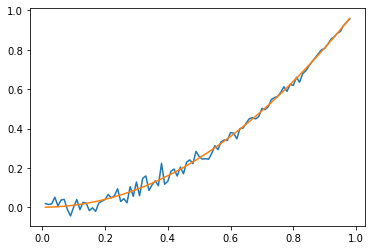

In [112]:
plt.plot(np.array(out)[:,0], np.array(out)[:,1])
plt.plot(np.array(out)[:,0], np.square(np.array(out)[:,0]))
plt.xlabel('true corr')
plt.ylabel('rec corr (using true structure)')